<a href="https://colab.research.google.com/github/Kelllyy1/Scripting/blob/main/nasa_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install requests matplotlib pillow

Enter your NASA API key: ··········


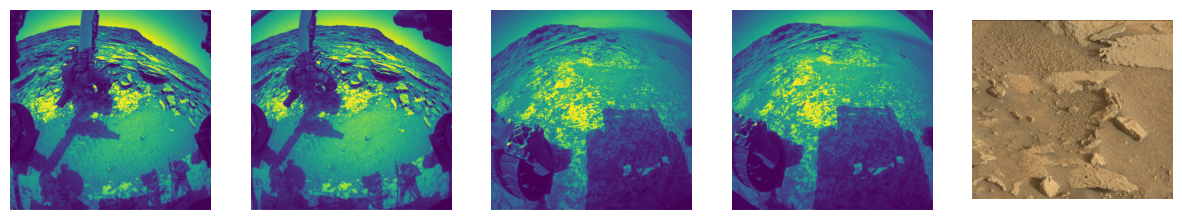

In [ ]:
import requests
import matplotlib.pyplot as plt
import PIL.Image as Image
from io import BytesIO
import getpass

# Prompt user to enter their NASA API key (hidden input)
API_KEY = getpass.getpass("Enter your NASA API key: ").strip()

# NASA API settings
ROVER_NAME = "curiosity"  # Options: 'curiosity', 'opportunity', 'spirit'
SOL = 1000  # Martian day (sol) to retrieve photos from

# API URL
url = f"https://api.nasa.gov/mars-photos/api/v1/rovers/{ROVER_NAME}/photos?sol={SOL}&api_key={API_KEY}"

# Make the API request
response = requests.get(url)

# Check if request was successful
if response.status_code == 200:
    data = response.json()
    photos = data.get("photos", [])

    if not photos:
        print("No photos found for the given sol.")
    else:
        # Extract up to 5 photo URLs
        photo_urls = [photo["img_src"] for photo in photos[:5]]

        # Display images
        fig, axes = plt.subplots(1, len(photo_urls), figsize=(15, 5))

        if len(photo_urls) == 1:
            axes = [axes]  # Ensure iterable

        for ax, url in zip(axes, photo_urls):
            img_response = requests.get(url)
            img = Image.open(BytesIO(img_response.content))
            ax.imshow(img)
            ax.axis("off")  # Hide axis

        plt.show()
else:
    print(f"Error: Unable to retrieve data (Status Code: {response.status_code})")

Enter latitude (e.g., 29.78 for Houston, TX): 36.1069
Enter longitude (e.g., -95.33 for Houston, TX): 112.1129


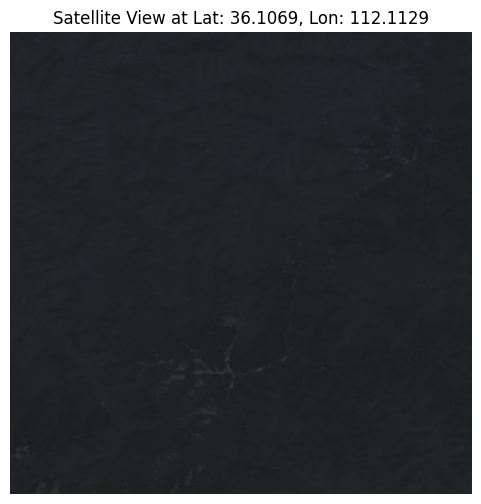

In [ ]:
import requests
import matplotlib.pyplot as plt
import PIL.Image as Image
from io import BytesIO
import getpass

# Prompt for API key (hidden input)
# API_KEY = getpass.getpass("Enter your NASA API key: ").strip()

# Ask user for coordinates
lat = input("Enter latitude (e.g., 29.78 for Houston, TX): ").strip()
lon = input("Enter longitude (e.g., -95.33 for Houston, TX): ").strip()

# NASA Earth Imagery API URL
url = f"https://api.nasa.gov/planetary/earth/imagery?lon={lon}&lat={lat}&dim=0.1&api_key={API_KEY}"

# Fetch the satellite image
response = requests.get(url)

if response.status_code == 200:
    img = Image.open(BytesIO(response.content))

    # Display the image
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Satellite View at Lat: {lat}, Lon: {lon}")
    plt.show()
else:
    print(f"Error: Unable to retrieve image (Status Code: {response.status_code})")

In [ ]:
import requests
import getpass

# Prompt for NASA API key (hidden input)
API_KEY = getpass.getpass("Enter your NASA API key: ").strip()

# NASA Exoplanet API Endpoint
exoplanet_url = f"https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+pl_name,pl_orbper,pl_rade,pl_masse+from+pscomppars&format=json"

# Fetch data
response = requests.get(exoplanet_url)

if response.status_code == 200:
    planets = response.json()

    print("\n🔭 Recently Discovered Exoplanets:")
    for planet in planets[:5]:  # Show first 5 planets
        print(f"🌎 Name: {planet['pl_name']}")
        print(f"   🔄 Orbital Period: {planet['pl_orbper']} days")
        print(f"   🌍 Radius: {planet['pl_rade']} Earth radii")
        print(f"   💪 Mass: {planet['pl_masse']} Earth masses")
        print("-" * 40)
else:
    print(f"Error: Unable to retrieve exoplanet data (Status Code: {response.status_code})")


Enter your NASA API key: ··········

🔭 Recently Discovered Exoplanets:
🌎 Name: OGLE-2016-BLG-1227L b
   🔄 Orbital Period: None days
   🌍 Radius: 13.9 Earth radii
   💪 Mass: 250.0 Earth masses
----------------------------------------
🌎 Name: Kepler-24 e
   🔄 Orbital Period: 18.998355 days
   🌍 Radius: 2.78 Earth radii
   💪 Mass: None Earth masses
----------------------------------------
🌎 Name: Kepler-1065 b
   🔄 Orbital Period: 3.60930891 days
   🌍 Radius: 3.73 Earth radii
   💪 Mass: None Earth masses
----------------------------------------
🌎 Name: HD 132406 b
   🔄 Orbital Period: 908.0 days
   🌍 Radius: 12.8 Earth radii
   💪 Mass: 1887.90073758 Earth masses
----------------------------------------
🌎 Name: TOI-1260 c
   🔄 Orbital Period: 7.493134 days
   🌍 Radius: 2.76 Earth radii
   💪 Mass: 13.2 Earth masses
----------------------------------------


In [ ]:
pip install requests geopy pillow

In [ ]:
import requests
import datetime
import random
import getpass
from geopy.geocoders import Nominatim
from io import BytesIO
from PIL import Image

# Prompt user for NASA API key securely
NASA_API_KEY = getpass.getpass("Enter your NASA API Key: ")

# Base URLs
MARS_ROVER_API_URL = "https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos"
EARTH_API_URL = "https://api.nasa.gov/planetary/earth/imagery"

# Function to display images
def display_image(image_url, title="Image"):
    response = requests.get(image_url)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        img.show(title=title)
    else:
        print(f"Failed to load image: {image_url}")

# Function to fetch Mars Rover photos
def get_mars_rover_photos():
    sol = random.randint(1000, 3000)  # Random Martian day
    params = {
        "api_key": NASA_API_KEY,
        "sol": sol,
        "camera": "NAVCAM",  # Navigation Camera
    }

    response = requests.get(MARS_ROVER_API_URL, params=params)
    if response.status_code == 200:
        data = response.json()
        photos = data.get("photos", [])
        if photos:
            return [photo["img_src"] for photo in photos[:3]]  # Return first 3 images
        else:
            print("No photos available for the selected sol.")
    else:
        print(f"Error fetching Mars photos: {response.status_code}")

    return []

# Function to fetch Earth imagery from a sunlit location
def get_earth_images():
    now = datetime.datetime.utcnow()
    lat = random.uniform(-60, 60)  # Avoid extreme poles
    lon = random.uniform(-180, 180)

    params = {
        "lat": lat,
        "lon": lon,
        "dim": 0.1,
        "date": now.strftime("%Y-%m-%d"),
        "api_key": NASA_API_KEY,
    }

    response = requests.get(EARTH_API_URL, params=params)
    if response.status_code == 200:
        return response.url, lat, lon  # Return image URL and coordinates
    else:
        print(f"Error fetching Earth image: {response.status_code}")

    return None, None, None

# Function to resolve coordinates to a location name
def get_location_name(lat, lon):
    geolocator = Nominatim(user_agent="geoapi")
    location = geolocator.reverse((lat, lon), exactly_one=True)
    return location.address if location else f"Lat: {lat}, Lon: {lon}"

if __name__ == "__main__":
    print("\nFetching Mars Rover Photos...\n")
    mars_images = get_mars_rover_photos()
    for i, img in enumerate(mars_images):
        print(f"Mars Image {i+1}: {img}")
        display_image(img, title=f"Mars Rover Image {i+1}")

    print("\nFetching Earth Imagery from a Sunlit Location...\n")
    earth_image, lat, lon = get_earth_images()
    if earth_image:
        location_name = get_location_name(lat, lon)
        print(f"Earth Image from: {location_name}")
        print(f"Earth Image URL: {earth_image}")
        display_image(earth_image, title="Earth Image")

Enter your NASA API Key: ··········

Fetching Mars Rover Photos...

Mars Image 1: https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02965/opgs/edr/ncam/NLB_660715373EDR_F0840786NCAM00264M_.JPG
Mars Image 2: https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02965/opgs/edr/ncam/NLB_660715341EDR_F0840786NCAM00264M_.JPG
Mars Image 3: https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02965/opgs/edr/ncam/NLB_660704576EDR_F0840540NCAM00207M_.JPG

Fetching Earth Imagery from a Sunlit Location...

Error fetching Earth image: 404


Enter your NASA API Key: ··········

Fetching Mars Rover Photos...

Mars Image 1: https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02965/opgs/edr/ncam/NLB_660715373EDR_F0840786NCAM00264M_.JPG


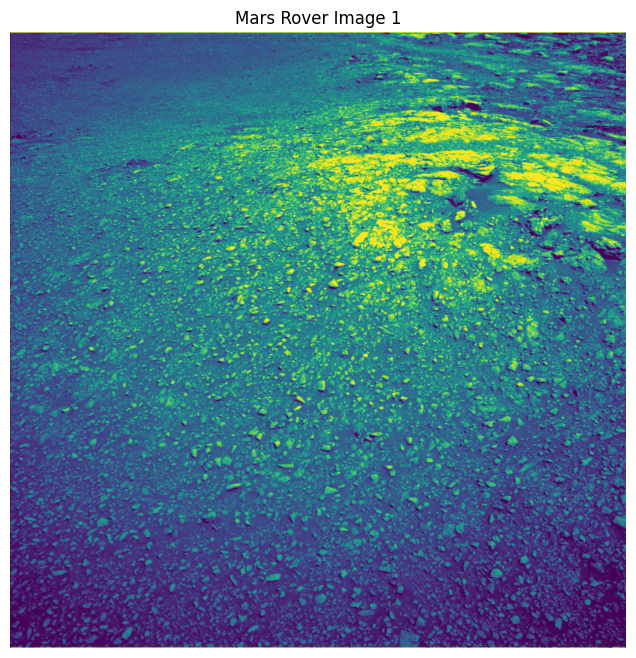

Mars Image 2: https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02965/opgs/edr/ncam/NLB_660715341EDR_F0840786NCAM00264M_.JPG


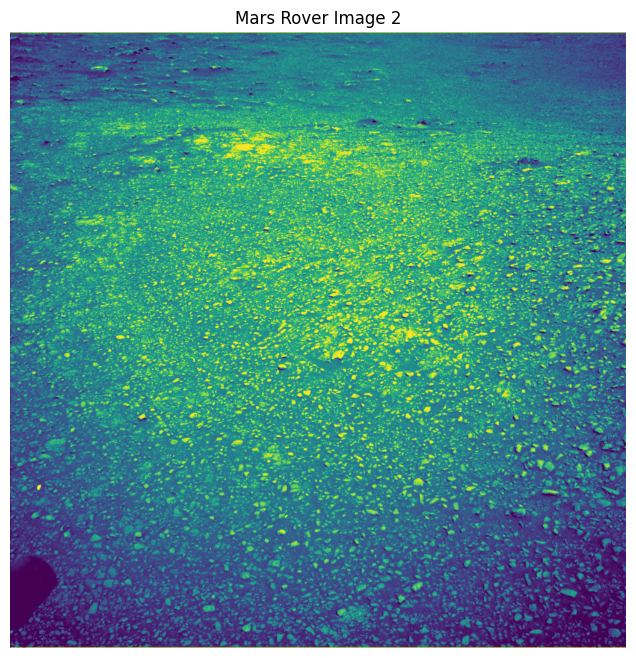

Mars Image 3: https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02965/opgs/edr/ncam/NLB_660704576EDR_F0840540NCAM00207M_.JPG


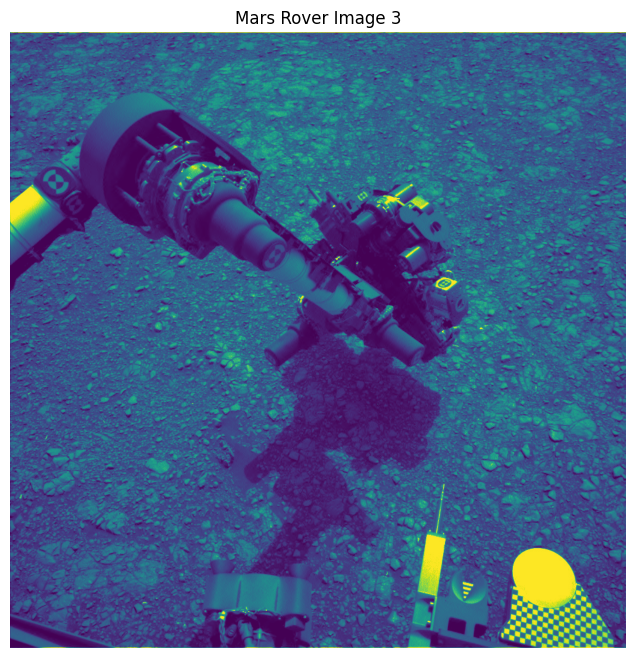


Enter latitude and longitude to fetch an Earth image (or select from options below):

- Great Pyramid of Giza: Lat 29.9792, Lon 31.1342
- Eiffel Tower: Lat 48.8584, Lon 2.2945
- Grand Canyon: Lat 36.1069, Lon -112.1129
- Mount Everest: Lat 27.9881, Lon 86.925
- Amazon Rainforest: Lat -3.4653, Lon -62.2159
- Great Wall of China: Lat 40.4319, Lon 116.5704
- Sydney Opera House: Lat -33.8568, Lon 151.2153
- Antarctica (McMurdo Station): Lat -77.8419, Lon 166.6863

Enter Latitude: 48.8584
Enter Longitude: 2.2945

Fetching Earth Imagery...

Earth Image from: Tour Eiffel, 5, Avenue Anatole France, Quartier du Gros-Caillou, Paris 7e Arrondissement, Paris, France métropolitaine, 75007, France
Earth Image URL: https://api.nasa.gov/planetary/earth/imagery?lat=48.8584&lon=2.2945&dim=0.1&date=2025-03-14&api_key=FmjNaTEjiWPhrZhbFMMm5qP9IhumQjUi1J31ugoE


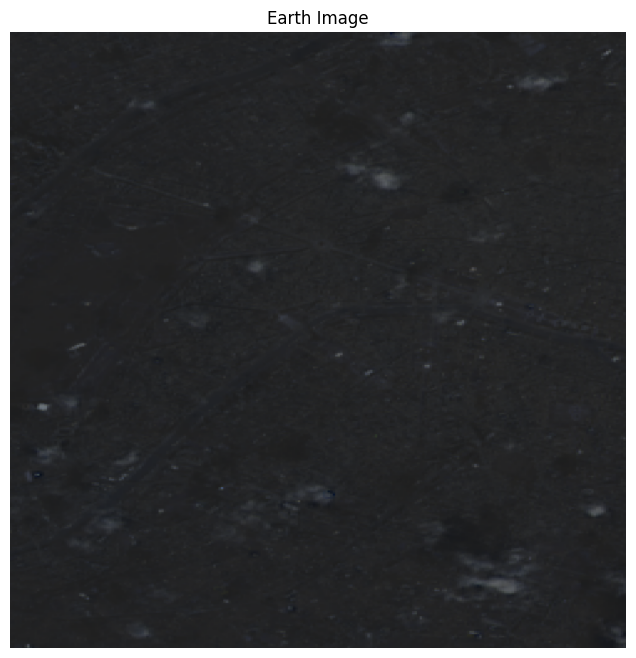

In [ ]:
import requests
import datetime
import getpass
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from geopy.geocoders import Nominatim
from io import BytesIO

# Prompt user for NASA API key securely
NASA_API_KEY = getpass.getpass("Enter your NASA API Key: ")

# Base URLs
MARS_ROVER_API_URL = "https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos"
EARTH_API_URL = "https://api.nasa.gov/planetary/earth/imagery"

# Function to display images using Matplotlib
def display_image(image_url, title="Image"):
    response = requests.get(image_url)
    if response.status_code == 200:
        img = mpimg.imread(BytesIO(response.content), format='jpeg')
        plt.figure(figsize=(8, 8))
        plt.imshow(img)
        plt.axis("off")
        plt.title(title)
        plt.show()
    else:
        print(f"Failed to load image: {image_url}")

# Function to fetch Mars Rover photos
def get_mars_rover_photos():
    sol = 2965  # Fixed sol for consistency
    params = {
        "api_key": NASA_API_KEY,
        "sol": sol,
        "camera": "NAVCAM",  # Navigation Camera
    }

    response = requests.get(MARS_ROVER_API_URL, params=params)
    if response.status_code == 200:
        data = response.json()
        photos = data.get("photos", [])
        if photos:
            return [photo["img_src"] for photo in photos[:3]]  # Return first 3 images
        else:
            print("No photos available for the selected sol.")
    else:
        print(f"Error fetching Mars photos: {response.status_code}")

    return []

# Function to fetch Earth imagery from user-specified location
def get_earth_images(lat, lon):
    now = datetime.datetime.utcnow()
    params = {
        "lat": lat,
        "lon": lon,
        "dim": 0.1,
        "date": now.strftime("%Y-%m-%d"),
        "api_key": NASA_API_KEY,
    }

    response = requests.get(EARTH_API_URL, params=params)
    if response.status_code == 200:
        return response.url  # Return image URL
    else:
        print(f"Error fetching Earth image: {response.status_code}")

    return None

# Function to resolve coordinates to a location name
def get_location_name(lat, lon):
    geolocator = Nominatim(user_agent="geoapi")
    location = geolocator.reverse((lat, lon), exactly_one=True)
    return location.address if location else f"Lat: {lat}, Lon: {lon}"

if __name__ == "__main__":
    print("\nFetching Mars Rover Photos...\n")
    mars_images = get_mars_rover_photos()
    for i, img in enumerate(mars_images):
        print(f"Mars Image {i+1}: {img}")
        display_image(img, title=f"Mars Rover Image {i+1}")

    print("\nEnter latitude and longitude to fetch an Earth image (or select from options below):\n")

    # Interesting Latitude & Longitude options
    interesting_places = {
        "Great Pyramid of Giza": (29.9792, 31.1342),
        "Eiffel Tower": (48.8584, 2.2945),
        "Grand Canyon": (36.1069, -112.1129),
        "Mount Everest": (27.9881, 86.9250),
        "Amazon Rainforest": (-3.4653, -62.2159),
        "Great Wall of China": (40.4319, 116.5704),
        "Sydney Opera House": (-33.8568, 151.2153),
        "Antarctica (McMurdo Station)": (-77.8419, 166.6863),
    }

    for place, (lat, lon) in interesting_places.items():
        print(f"- {place}: Lat {lat}, Lon {lon}")

    lat = float(input("\nEnter Latitude: "))
    lon = float(input("Enter Longitude: "))

    print("\nFetching Earth Imagery...\n")
    earth_image = get_earth_images(lat, lon)
    if earth_image:
        location_name = get_location_name(lat, lon)
        print(f"Earth Image from: {location_name}")
        print(f"Earth Image URL: {earth_image}")
        display_image(earth_image, title="Earth Image")


In [ ]:
pip install requests geopy pillow matplotlib timezonefinder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 38.4 MB/s eta 0:00:00


Enter your NASA API Key: ··········

Fetching Mars Rover Photos...

Mars Image 1: https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02965/opgs/edr/ncam/NLB_660715373EDR_F0840786NCAM00264M_.JPG


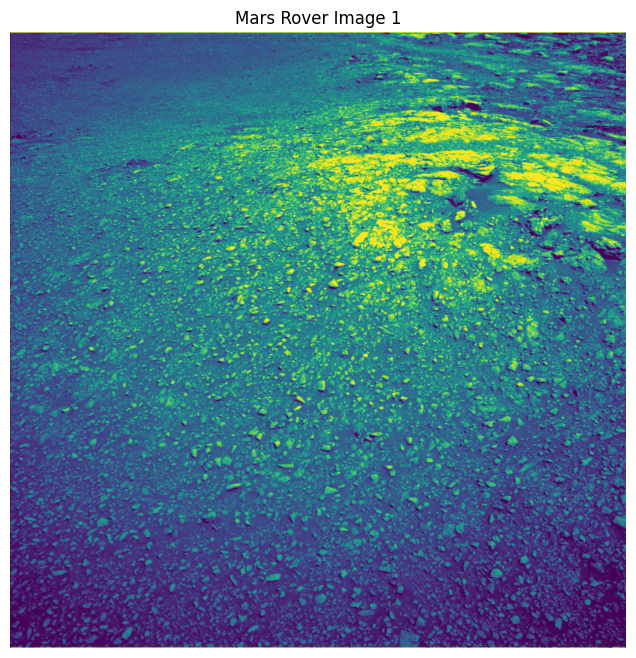

Mars Image 2: https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02965/opgs/edr/ncam/NLB_660715341EDR_F0840786NCAM00264M_.JPG


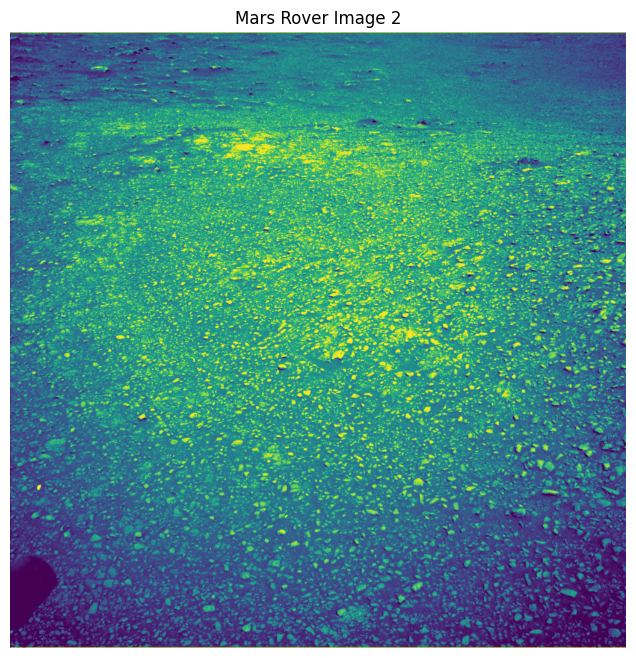

Mars Image 3: https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02965/opgs/edr/ncam/NLB_660704576EDR_F0840540NCAM00207M_.JPG


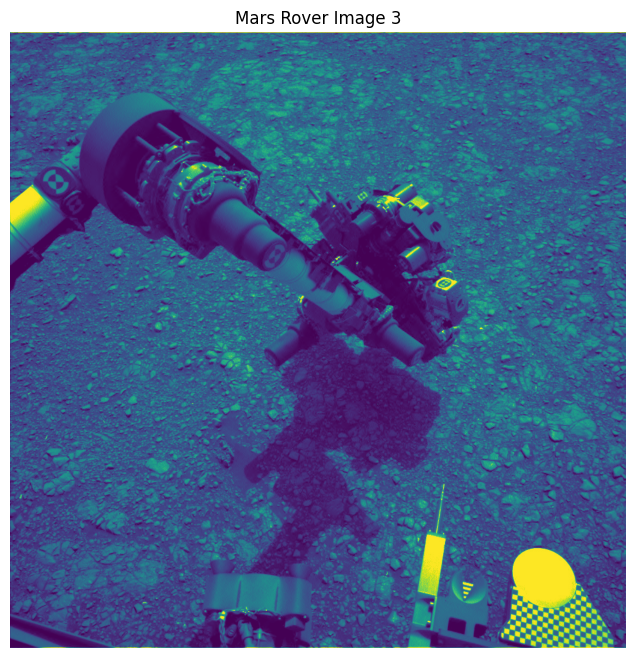


Prioritizing Sunlit Locations for Earth Imagery...

Fetching images from the following sunlit locations:

- Mount Everest: Lat 27.9881, Lon 86.925
- Great Wall of China: Lat 40.4319, Lon 116.5704
- Sydney Opera House: Lat -33.8568, Lon 151.2153
- Antarctica (McMurdo Station): Lat -77.8419, Lon 166.6863

Fetching Earth Imagery for Mount Everest...

Earth Image from: Hillary Step, Khumbupasanglahmu-04, Khumbupasanglahmu, सोलुखुम्बु, कोशी प्रदेश, नेपाल
Earth Image URL: https://api.nasa.gov/planetary/earth/imagery?lat=27.9881&lon=86.925&dim=0.025&date=2025-03-14&api_key=FmjNaTEjiWPhrZhbFMMm5qP9IhumQjUi1J31ugoE


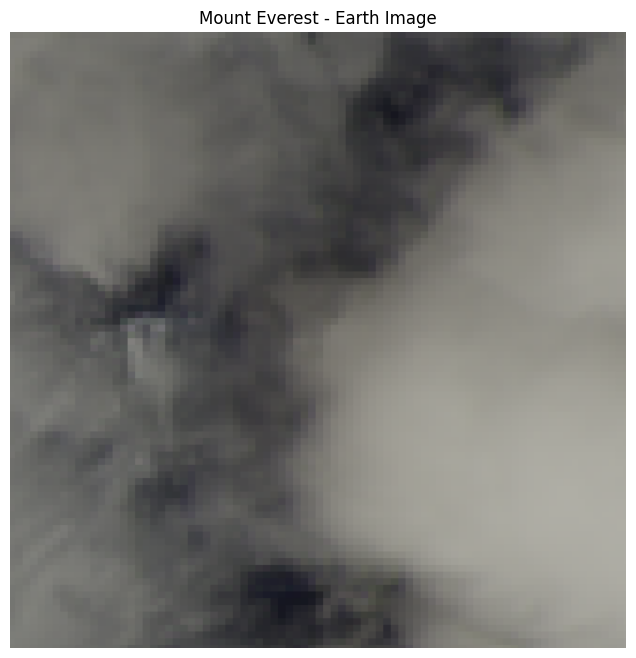


Fetching Earth Imagery for Great Wall of China...

Earth Image from: 慕田峪长城, 慕田峪村, 怀柔区, 北京市, 101405, 中国
Earth Image URL: https://api.nasa.gov/planetary/earth/imagery?lat=40.4319&lon=116.5704&dim=0.025&date=2025-03-14&api_key=FmjNaTEjiWPhrZhbFMMm5qP9IhumQjUi1J31ugoE


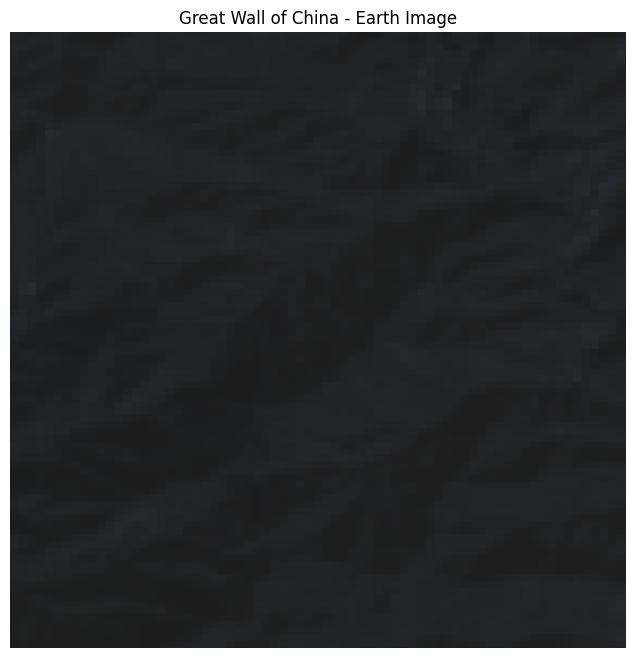


Fetching Earth Imagery for Sydney Opera House...

Earth Image from: Sydney Opera House, 2, Macquarie Street, Quay Quarter, Sydney, Sydney CBD, Sydney, Council of the City of Sydney, New South Wales, 2000, Australia
Earth Image URL: https://api.nasa.gov/planetary/earth/imagery?lat=-33.8568&lon=151.2153&dim=0.025&date=2025-03-14&api_key=FmjNaTEjiWPhrZhbFMMm5qP9IhumQjUi1J31ugoE


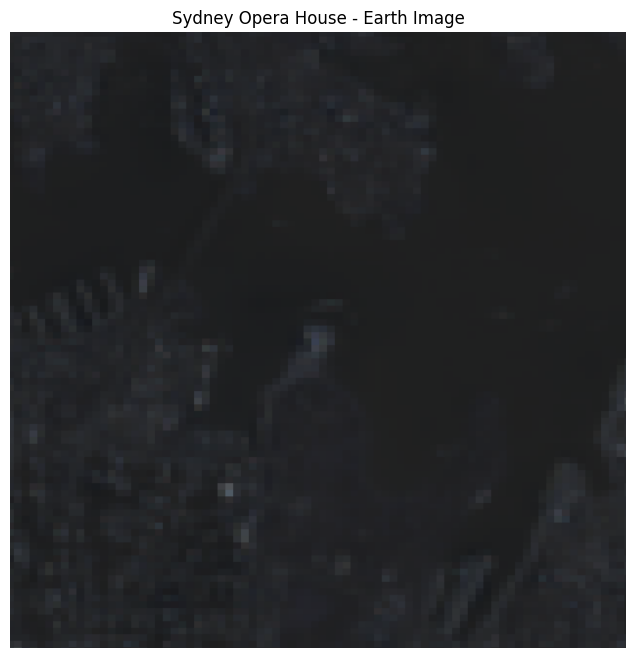


Fetching Earth Imagery for Antarctica (McMurdo Station)...

Error fetching Earth image: 404


In [ ]:
import requests
import datetime
import getpass
import pytz
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from geopy.geocoders import Nominatim
from io import BytesIO
from timezonefinder import TimezoneFinder

# Prompt user for NASA API key securely
NASA_API_KEY = getpass.getpass("Enter your NASA API Key: ")

# Base URLs
MARS_ROVER_API_URL = "https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos"
EARTH_API_URL = "https://api.nasa.gov/planetary/earth/imagery"

# Function to display images using Matplotlib
def display_image(image_url, title="Image"):
    response = requests.get(image_url)
    if response.status_code == 200:
        img = mpimg.imread(BytesIO(response.content), format='jpeg')
        plt.figure(figsize=(8, 8))
        plt.imshow(img)
        plt.axis("off")
        plt.title(title)
        plt.show()
    else:
        print(f"Failed to load image: {image_url}")

# Function to fetch Mars Rover photos
def get_mars_rover_photos():
    sol = 2965  # Fixed sol for consistency
    params = {
        "api_key": NASA_API_KEY,
        "sol": sol,
        "camera": "NAVCAM",  # Navigation Camera
    }

    response = requests.get(MARS_ROVER_API_URL, params=params)
    if response.status_code == 200:
        data = response.json()
        photos = data.get("photos", [])
        if photos:
            return [photo["img_src"] for photo in photos[:3]]  # Return first 3 images
        else:
            print("No photos available for the selected sol.")
    else:
        print(f"Error fetching Mars photos: {response.status_code}")

    return []

# Function to fetch Earth imagery
def get_earth_images(lat, lon):
    now = datetime.datetime.utcnow()
    params = {
        "lat": lat,
        "lon": lon,
        "dim": 0.025,  # Maximum zoom level for high resolution
        "date": now.strftime("%Y-%m-%d"),
        "api_key": NASA_API_KEY,
    }

    response = requests.get(EARTH_API_URL, params=params)
    if response.status_code == 200:
        return response.url  # Return image URL
    else:
        print(f"Error fetching Earth image: {response.status_code}")

    return None

# Function to resolve coordinates to a location name
def get_location_name(lat, lon):
    geolocator = Nominatim(user_agent="geoapi")
    location = geolocator.reverse((lat, lon), exactly_one=True)
    return location.address if location else f"Lat: {lat}, Lon: {lon}"

# Function to check if a location is currently in sunlight
def is_sunlit(lat, lon):
    tf = TimezoneFinder()
    timezone_str = tf.timezone_at(lng=lon, lat=lat)

    if timezone_str:
        local_time = datetime.datetime.now(pytz.timezone(timezone_str))
        hour = local_time.hour
        return 6 <= hour <= 18  # Daylight hours (6 AM - 6 PM)

    return False  # Default to no sunlight if timezone can't be determined

if __name__ == "__main__":
    print("\nFetching Mars Rover Photos...\n")
    mars_images = get_mars_rover_photos()
    for i, img in enumerate(mars_images):
        print(f"Mars Image {i+1}: {img}")
        display_image(img, title=f"Mars Rover Image {i+1}")

    print("\nPrioritizing Sunlit Locations for Earth Imagery...\n")

    # Interesting Latitude & Longitude options
    interesting_places = {
        "Great Pyramid of Giza": (29.9792, 31.1342),
        "Eiffel Tower": (48.8584, 2.2945),
        "Grand Canyon": (36.1069, -112.1129),
        "Mount Everest": (27.9881, 86.9250),
        "Amazon Rainforest": (-3.4653, -62.2159),
        "Great Wall of China": (40.4319, 116.5704),
        "Sydney Opera House": (-33.8568, 151.2153),
        "Antarctica (McMurdo Station)": (-77.8419, 166.6863),
    }

    sunlit_places = {place: coords for place, coords in interesting_places.items() if is_sunlit(*coords)}

    if not sunlit_places:
        print("No interesting locations currently have sunlight. Try again later.")
    else:
        print("Fetching images from the following sunlit locations:\n")
        for place, (lat, lon) in sunlit_places.items():
            print(f"- {place}: Lat {lat}, Lon {lon}")

        # Display images from sunlit locations
        for place, (lat, lon) in sunlit_places.items():
            print(f"\nFetching Earth Imagery for {place}...\n")
            earth_image = get_earth_images(lat, lon)
            if earth_image:
                location_name = get_location_name(lat, lon)
                print(f"Earth Image from: {location_name}")
                print(f"Earth Image URL: {earth_image}")
                display_image(earth_image, title=f"{place} - Earth Image")